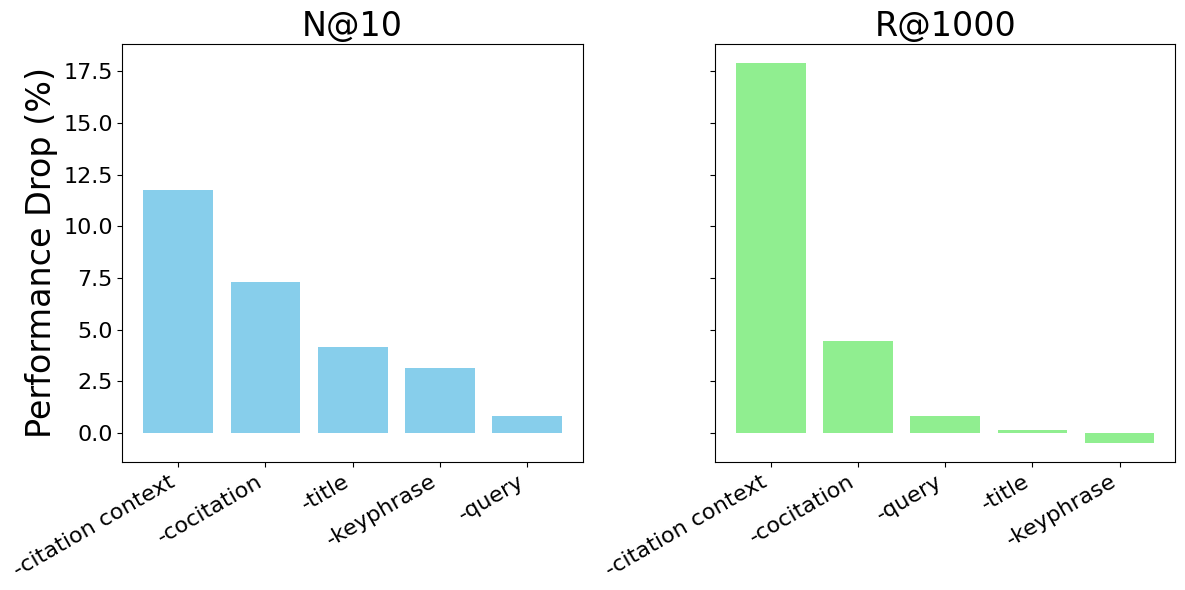

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("data.csv")

ablation_types = list(df["setting"])
n_at_10 = list(df["NDCG@10"])
r_at_1000 = list(df["R@1000"])

# Data from the image
# ablation_types = ['Full', '-keyphrase', '-cocitation', '-title', '-query', '-citation context']
# n_at_10 = [40.21111111, 36.98888889, 34.03333333, 38.53333333, 39.26666667, 35.5]
# r_at_1000 = [76.66666667, 75.28888889, 69.94444444, 76.62222222, 75.88888889, 63.06666667]

# Calculate performance drop (%) compared to 'Full'
n_at_10_drop = [0 if i == 0 else ((n_at_10[0] - x) / n_at_10[0]) * 100 for i, x in enumerate(n_at_10)]
r_at_1000_drop = [0 if i == 0 else ((r_at_1000[0] - x) / r_at_1000[0]) * 100 for i, x in enumerate(r_at_1000)]

n_at_10_drop = n_at_10_drop[1:]
r_at_1000_drop = r_at_1000_drop[1:]

# Combine data with ablation types and sort by performance drop
n_data = list(zip(n_at_10_drop, ablation_types[1:]))
r_data = list(zip(r_at_1000_drop, ablation_types[1:]))
n_data.sort(reverse=True)  # Sort N@10 drop in descending order
r_data.sort(reverse=True)  # Sort R@1000 drop in descending order

n_at_10_sorted, ablation_types_sorted_n = zip(*n_data)
r_at_1000_sorted, ablation_types_sorted_r = zip(*r_data)

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Bar width and positions
bar_width = 0.8
index = np.arange(len(ablation_types) - 1)

# Create histograms
ax1.bar(index, n_at_10_sorted, bar_width, color='skyblue', label='N@10 Drop (%)')
ax2.bar(index, r_at_1000_sorted, bar_width, color='lightgreen', label='R@1000 Drop (%)')

# Customize the plots
# ax1.set_xlabel('Ablation Type (sorted by N@10 Drop)', fontsize = 20)
ax1.set_ylabel('Performance Drop (%)', fontsize = 24)
ax1.set_title('N@10', fontsize = 24)
ax1.set_xticks(index)
ax1.set_xticklabels(ablation_types_sorted_n, rotation=30, ha="right")
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
# ax1.legend(fontsize = 20)

# ax2.set_xlabel('Ablation Type (sorted by R@1000 Drop)', fontsize = 20)
ax2.set_title('R@1000', fontsize = 24)
ax2.set_xticks(index)
ax2.set_xticklabels(ablation_types_sorted_r, rotation=30, ha="right")
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
# ax2.legend(fontsize = 20)

plt.tight_layout()
plt.savefig("impact_of_data_sources.pdf")
plt.show()

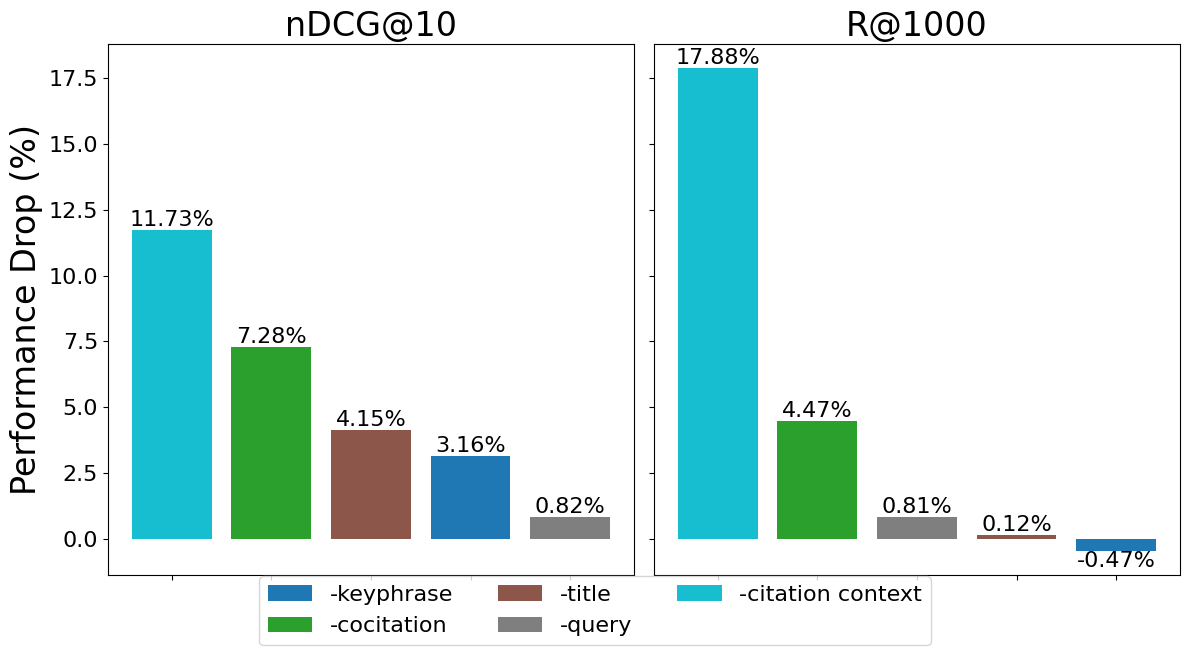

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

df = pd.read_csv("data.csv")

ablation_types = list(df["setting"])
n_at_10 = list(df["NDCG@10"])
r_at_1000 = list(df["R@1000"])

# Data from the image
# ablation_types = ['Full', '-keyphrase', '-cocitation', '-title', '-query', '-citation context']
# n_at_10 = [40.21111111, 36.98888889, 34.03333333, 38.53333333, 39.26666667, 35.5]
# r_at_1000 = [76.66666667, 75.28888889, 69.94444444, 76.62222222, 75.88888889, 63.06666667]

# Calculate performance drop (%) compared to 'Full'
n_at_10_drop = [0 if i == 0 else ((n_at_10[0] - x) / n_at_10[0]) * 100 for i, x in enumerate(n_at_10)]
r_at_1000_drop = [0 if i == 0 else ((r_at_1000[0] - x) / r_at_1000[0]) * 100 for i, x in enumerate(r_at_1000)]

n_at_10_drop = n_at_10_drop[1:]
r_at_1000_drop = r_at_1000_drop[1:]

# Combine data with ablation types and sort by performance drop
n_data = list(zip(n_at_10_drop, ablation_types[1:]))
r_data = list(zip(r_at_1000_drop, ablation_types[1:]))
n_data.sort(reverse=True)  # Sort N@10 drop in descending order
r_data.sort(reverse=True)  # Sort R@1000 drop in descending order

n_at_10_sorted, ablation_types_sorted_n = zip(*n_data)
r_at_1000_sorted, ablation_types_sorted_r = zip(*r_data)

# Assign colors to each ablation type
ablation_types_ab = ablation_types[1:]
colors = plt.cm.tab10(np.linspace(0, 1, len(ablation_types_ab)))
type_to_color = dict(zip(ablation_types_ab, colors))

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Bar width and positions
bar_width = 0.8
index = np.arange(len(ablation_types) - 1)

# Colors for each plot
colors_n = [type_to_color[typ] for typ in ablation_types_sorted_n]
colors_r = [type_to_color[typ] for typ in ablation_types_sorted_r]

# Create histograms
ax1.bar(index, n_at_10_sorted, bar_width, color=colors_n)
ax2.bar(index, r_at_1000_sorted, bar_width, color=colors_r)

# Add numbers on top or below the bars for ax1
for i, v in enumerate(n_at_10_sorted):
    if v >= 0:
        ax1.text(i, v, f"{v:.2f}%", ha='center', va='bottom', fontsize=16)
    else:
        ax1.text(i, v, f"{v:.2f}%", ha='center', va='top', fontsize=16)

# Add numbers on top or below the bars for ax2
for i, v in enumerate(r_at_1000_sorted):
    if v >= 0:
        ax2.text(i, v, f"{v:.2f}%", ha='center', va='bottom', fontsize=16)
    else:
        ax2.text(i, v, f"{v:.2f}%", ha='center', va='top', fontsize=16)

# Customize the plots
# ax1.set_xlabel('Ablation Type (sorted by N@10 Drop)', fontsize = 20)
ax1.set_ylabel('Performance Drop (%)', fontsize = 24)
ax1.set_title('nDCG@10', fontsize = 24)
ax1.set_xticks(index)
ax1.set_xticklabels([])  # Remove x tick labels
ax1.tick_params(axis='y', labelsize=16)

# ax2.set_xlabel('Ablation Type (sorted by R@1000 Drop)', fontsize = 20)
ax2.set_title('R@1000', fontsize = 24)
ax2.set_xticks(index)
ax2.set_xticklabels([])  # Remove x tick labels
ax2.tick_params(axis='y', labelsize=16)

# Create legend elements
legend_elements = [Patch(facecolor=type_to_color[typ], label=typ) for typ in ablation_types_ab]

# Add a single legend for both plots
fig.legend(handles=legend_elements, loc='upper center', ncol=3, fontsize=16, bbox_to_anchor=(0.5, 0.05))

plt.tight_layout()
# plt.subplots_adjust(bottom=0.18)
plt.savefig("impact_of_data_sources.pdf", bbox_inches='tight')
plt.show()